## Case Study: Anime Rating Prediction

## Context

Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. You as a data scientist at Streamist are tasked with identifying the important factors and building a predictive model to predict the rating on an anime.


## Key Questions:

1. What are the key factors influencing the rating of an anime?
2. Is there a good predictive model for the rating of an anime? What does the performance assessment look like for such a model?


## Data Information

Each record in the database provides a description of an anime. Detailed attribute information can be found below.

**Attribute Information**:

1. title - title of anime
2. description - synopsis of plot
3. mediaType - format of publication
4. eps - number of episodes (movies are considered 1 episode)
5. duration - duration of episode in minutes
6. ongoing - whether it is ongoing
7. sznOfRelease - season of release (Winter, Spring, Fall)
8. years_running - number of years the anime ran/is running
9. studio_primary - primary studio of production
10. studios_colab - whether there was a collaboration between studios to produce the anime
11. contentWarn - whether anime has a content warning
12. watched - number of users that completed it
13. watching - number of users that are watching it
14. wantWatch - number of users that want to watch it
15. dropped - number of users that dropped it before completion
16. rating - average user rating
17. votes - number of votes that contribute to rating
18. tag_Based_on_a_Manga - whether the anime is based on a manga
19. tag_Comedy - whether the anime is of Comedy genre
20. tag_Action - whether the anime is of Action genre
21. tag_Fantasy - whether the anime is of Fantasy genre
22. tag_Sci_Fi - whether the anime is of Sci-Fi genre
23. tag_Shounen - whether the anime has a tag Shounen
24. tag_Original_Work - whether the anime is an original work
25. tag_Non_Human_Protagonists - whether the anime has any non-human protagonists
26. tag_Drama - whether the anime is of Drama genre
27. tag_Adventure - whether the anime is of Adventure genre
28. tag_Family_Friendly - whether the anime is family-friendly
29. tag_Short_Episodes - whether the anime has short episodes
30. tag_School_Life - whether the anime is regarding school life
31. tag_Romance - whether the anime is of Romance genre
32. tag_Shorts - whether the anime has a tag Shorts
33. tag_Slice_of_Life - whether the anime has a tag Slice of Life
34. tag_Seinen - whether the anime has a tag Seinen
35. tag_Supernatural - whether the anime has a tag Supernatural
36. tag_Magic - whether the anime has a tag Magic
37. tag_Animal_Protagonists - whether the anime has animal protagonists
38. tag_Ecchi - whether the anime has a tag Ecchi
39. tag_Mecha - whether the anime has a tag Mecha
40. tag_Based_on_a_Light_Novel - whether the anime is based on a light novel
41. tag_CG_Animation - whether the anime has a tag CG Animation
42. tag_Superpowers - whether the anime has a tag Superpowers
43. tag_Others - whether the anime has other tags
44. tag_is_missing - whether tag is missing or not

### Loading Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

import warnings

warnings.filterwarnings("ignore")

# To build linear regression model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("anime_data.csv")

data = df.copy() #----------------Copy of the original

data.head()

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,...,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,...,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,...,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,...,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,...,0,0,0,0,0,0,0,0,0,0


### Exploratory Data Analysis. Dropping NA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

In [4]:
data.columns

Index(['title', 'description', 'mediaType', 'eps', 'duration', 'ongoing',
       'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab',
       'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating',
       'votes', 'tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Action',
       'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen', 'tag_Original_Work',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Adventure',
       'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_School_Life',
       'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Magic', 'tag_Animal_Protagonists', 'tag_Ecchi',
       'tag_Mecha', 'tag_Based_on_a_Light_Novel', 'tag_CG_Animation',
       'tag_Superpowers', 'tag_Others', 'tag_missing'],
      dtype='object')

In [5]:
data[['title', 'description', 'mediaType', 'eps', 'duration', 'ongoing',
       'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab',
       'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating',
       'votes']].isnull().sum()

title                0
description       4468
mediaType            0
eps                  0
duration          4636
ongoing              0
sznOfRelease         0
years_running        0
studio_primary       0
studios_colab        0
contentWarn          0
watched              0
watching             0
wantWatch            0
dropped              0
rating               0
votes                0
dtype: int64

Title and Description, these are two attributes that we won't be using for building the model. Think about a scenario whereby a Food Delivery app plans on surprising you with a promotional offer. Do they decide the offer based on your name or based on customer attribute like purchase, tenure with the app etc.

In [6]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns #--data.select_dtype (data type())
cat_columns

Index(['title', 'description', 'mediaType', 'ongoing', 'sznOfRelease',
       'studio_primary'],
      dtype='object')

In [7]:
#------------For Lopp: Iterate through required categorical columns

for i in ["mediaType", "ongoing", "sznOfRelease", "studio_primary"]:
    
    #Print Statement - Which Category
    print("Unique values in", i, "are :")
    
    #Value_Counts with normalize function
    print(data[i].value_counts(normalize=True)*100)
    print("-" * 50)
    print()

Unique values in mediaType are :
TV             32.997273
Movie          15.932568
OVA            14.626890
Music Video    10.660276
Web             9.668622
DVD Special     6.635815
Other           4.792992
TV Special      4.164945
is_missing      0.520618
Name: mediaType, dtype: float64
--------------------------------------------------

Unique values in ongoing are :
False    99.049665
True      0.950335
Name: ongoing, dtype: float64
--------------------------------------------------

Unique values in sznOfRelease are :
is_missing    70.688373
Spring         9.379390
Fall           8.354681
Winter         5.925130
Summer         5.652425
Name: sznOfRelease, dtype: float64
--------------------------------------------------

Unique values in studio_primary are :
Others                  35.864805
is_missing              26.510206
Toei Animation           5.255764
Sunrise                  3.553425
J.C. Staff               2.817949
MADHOUSE                 2.784894
TMS Entertainment     

1. Movie Titles and Descriptions are Unique. Hence they don't add anything when it comes to the model learning about the data. Hence we drop them


2. Media Type - Only 0.52% of the records are missing. Since this number is small, we can go ahead and replace it with mode of the column. This is the basic missing value check that we can implement for this attribute. We can replace them with others as well to make a more safer approximation


3. Ongoing - 99% of the values are false here. This means there is no variability in the variable, i.e. all values mostly False. Hence we can drop it.


4. Season of Release - 70% of the records are missing. We could have imputed it if we had the release date. Since we don't have access to necessary information using which we could have imputed this column, we will go ahead and drop it from our analysis. Note: 70% of records is a risk to impute, since it can introduce a lot of incorrect and biased information in the data


5. studio_primary - Missing records are only 26.5%, but hard to impute. Hence we drop. Prbably we can look up for the studio information online or use some web scraping mechanism in real life, using the title of the Anime

In [8]:
data.drop(["title", "description",  "ongoing", "sznOfRelease", "studio_primary"], axis=1, inplace=True)

#inplace=True - > The changes are saved in the original data

### Data Wrangling and Cleaning


Missing Value Treatment for mediaType

In [9]:
data['mediaType'].mode()

0    TV
dtype: object

In [10]:
data[data['mediaType']=='is_missing'].head()

,mediaType,eps,duration,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
76,is_missing,1,48.0,0,0,0,4380.0,89,3105,34,...,1,0,0,0,0,0,0,0,0,0
152,is_missing,1,23.0,0,0,0,3668.0,63,2389,39,...,1,0,0,0,0,0,0,0,0,0
235,is_missing,11,NaN,0,0,0,5243.0,714,8225,494,...,0,0,0,0,0,0,0,0,0,0
371,is_missing,4,NaN,0,0,0,8019.0,209,3815,42,...,1,0,0,0,0,1,0,0,0,0
579,is_missing,12,NaN,3,0,1,8353.0,210,2482,137,...,0,0,0,0,1,0,0,0,0,0


In [11]:
#----------for Loop data.iterrows() --- iterate through all rows step by step
for i,row in data.iterrows():
    
    eps=data.at[i,'eps'] #i here is the row index
            
    if data.at[i,'mediaType']=='is_missing':
        
        data.at[i,'mediaType']='TV' #Replacing with mode

In [12]:
data['mediaType'].value_counts(normalize=True)

TV             0.335179
Movie          0.159326
OVA            0.146269
Music Video    0.106603
Web            0.096686
DVD Special    0.066358
Other          0.047930
TV Special     0.041649
Name: mediaType, dtype: float64

1. Note we wrangled the data, instead of using a simple mean, median, mode to replace the missing values. Note, there is no correct oor incorrect imputation, till the user can justify it. We will go ahead and drop the duration column since most of the records are missing.

In [13]:
data['duration'].describe()

count    7465.000000
mean       24.230141
std        31.468171
min         1.000000
25%         4.000000
50%         8.000000
75%        30.000000
max       163.000000
Name: duration, dtype: float64

In [14]:
#----------for Loop data.iterrows() --- iterate through all rows step by step

import math

for i,row in data.iterrows():
    
    eps=data.at[i,'duration'] #i here is the row index
    
    median_du=data['duration'].median()
            
    if pd.isna(data.at[i,'duration']) :
        
        data.at[i,'duration']=median_du #Replacing with mode

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mediaType                   12101 non-null  object 
 1   eps                         12101 non-null  int64  
 2   duration                    12101 non-null  float64
 3   years_running               12101 non-null  int64  
 4   studios_colab               12101 non-null  int64  
 5   contentWarn                 12101 non-null  int64  
 6   watched                     12101 non-null  float64
 7   watching                    12101 non-null  int64  
 8   wantWatch                   12101 non-null  int64  
 9   dropped                     12101 non-null  int64  
 10  rating                      12101 non-null  float64
 11  votes                       12101 non-null  int64  
 12  tag_Based_on_a_Manga        12101 non-null  int64  
 13  tag_Comedy                  121

In [16]:
data.columns

Index(['mediaType', 'eps', 'duration', 'years_running', 'studios_colab',
       'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating',
       'votes', 'tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Action',
       'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen', 'tag_Original_Work',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Adventure',
       'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_School_Life',
       'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Magic', 'tag_Animal_Protagonists', 'tag_Ecchi',
       'tag_Mecha', 'tag_Based_on_a_Light_Novel', 'tag_CG_Animation',
       'tag_Superpowers', 'tag_Others', 'tag_missing'],
      dtype='object')

In [17]:
#---------Validate: Tag columns are binary in nature

req_cols=['studios_colab', 'contentWarn','tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Action', 'tag_Fantasy',
       'tag_Sci_Fi', 'tag_Shounen', 'tag_Original_Work',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Adventure',
       'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_School_Life',
       'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Magic', 'tag_Animal_Protagonists', 'tag_Ecchi',
       'tag_Mecha', 'tag_Based_on_a_Light_Novel', 'tag_CG_Animation',
       'tag_Superpowers', 'tag_Others', 'tag_missing']

for i in req_cols:

    print(i, " - ", data[i].unique(), end=", ")

studios_colab  -  [0 1], contentWarn  -  [1 0], tag_Based_on_a_Manga  -  [1 0], tag_Comedy  -  [0 1], tag_Action  -  [1 0], tag_Fantasy  -  [1 0], tag_Sci_Fi  -  [0 1], tag_Shounen  -  [1 0], tag_Original_Work  -  [0 1], tag_Non_Human_Protagonists  -  [0 1], tag_Drama  -  [1 0], tag_Adventure  -  [1 0], tag_Family_Friendly  -  [0 1], tag_Short_Episodes  -  [0 1], tag_School_Life  -  [0 1], tag_Romance  -  [0 1], tag_Shorts  -  [0 1], tag_Slice_of_Life  -  [0 1], tag_Seinen  -  [0 1], tag_Supernatural  -  [0 1], tag_Magic  -  [0 1], tag_Animal_Protagonists  -  [0 1], tag_Ecchi  -  [0 1], tag_Mecha  -  [0 1], tag_Based_on_a_Light_Novel  -  [0 1], tag_CG_Animation  -  [0 1], tag_Superpowers  -  [0 1], tag_Others  -  [0 1], tag_missing  -  [0 1], 

### Assumptions of Linear Regression:

*Checks Pre Model Development*

1. Linearity: There is a linear relationship between the dependent and independent variables. We will mostly look into the linear trend between dependent and continuous numeric variables


2. Normal Distribution of Dependent and Independent Variable - The dependent and independent variables should be normally distributed. In the case of skewed distribution, the variable can be treated for outliers or any form of transformation (e.g. log) can be applied to the variable


3. Multicollinearity: Independent variables shouldn't be highly correlated to each other. Using two or more highly correlated variables prevents the model from capturing the true beta value. This is important for cases where the beta value is important, specifically where the idea is to understand the change in $y$ when $x$ changes by certain unit. Else, we can go ahead and retain the correlated variables


*Checks Post Model Development*


4. Homoscedasticity: Residuals doesn't follow a trend for different values of Y, i.e. when residuals are plotted against different values of y, there shouldn't be any trend


5. Errors are normally distributed. This is similar to pointer 4


In [18]:
numeric_continuous_cols=['eps', 'years_running', 'watched', 'watching', 'wantWatch', 'dropped', 'votes', 'rating']

data[numeric_continuous_cols].describe().round(1)

,eps,years_running,watched,watching,wantWatch,dropped,votes,rating
count,12101.0,12101.0,12101.0,12101.0,12101.0,12101.0,12101.0,12101.0
mean,13.4,0.3,2862.6,256.3,1203.7,151.6,2088.1,2.9
std,57.9,1.2,7724.3,1380.8,2294.3,493.9,5950.3,0.8
min,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.8
25%,1.0,0.0,55.0,2.0,49.0,3.0,34.0,2.3
50%,2.0,0.0,341.0,14.0,296.0,12.0,219.0,3.0
75%,12.0,0.0,2026.0,100.0,1275.0,65.0,1414.0,3.6
max,2527.0,51.0,161567.0,74537.0,28541.0,19481.0,131067.0,4.7


### Linearity of Dependent vs. Independent Variables

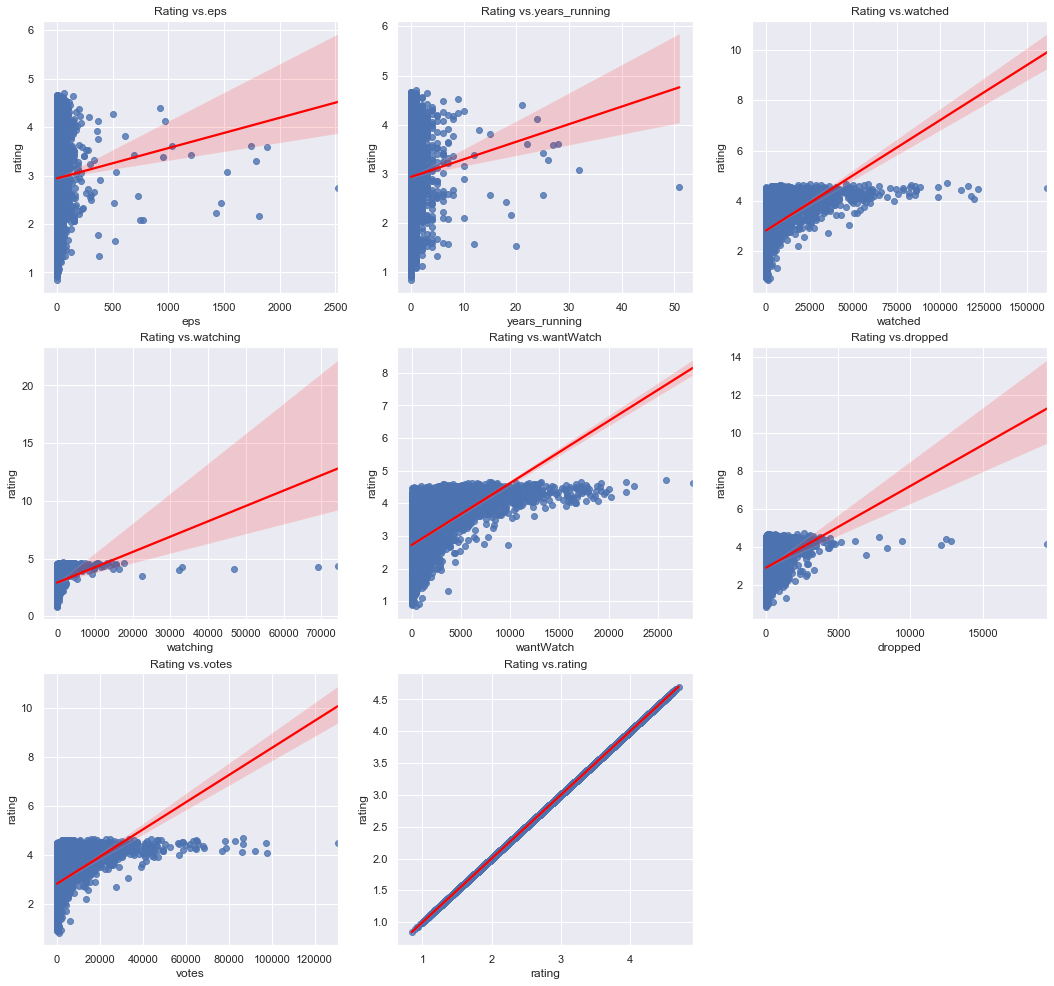

In [19]:
plt.figure(figsize=(18,17));

pos = 1

for i in numeric_continuous_cols:
    
    plt.subplot(3, 3, pos)
    plt.title("Rating vs."+i)
    sns.regplot(x=i,y='rating',data=data, line_kws={"color": "red"})
    pos += 1 

Rating vs. Rating (the last visualization) doesn't add any value, however, when we plot rating (the dependent variable) on Y axis and independent variables on the x axis, we get a sense of linearity. We have excluded all binary and categorical columns for checking this assumptions.

### Correlation Check

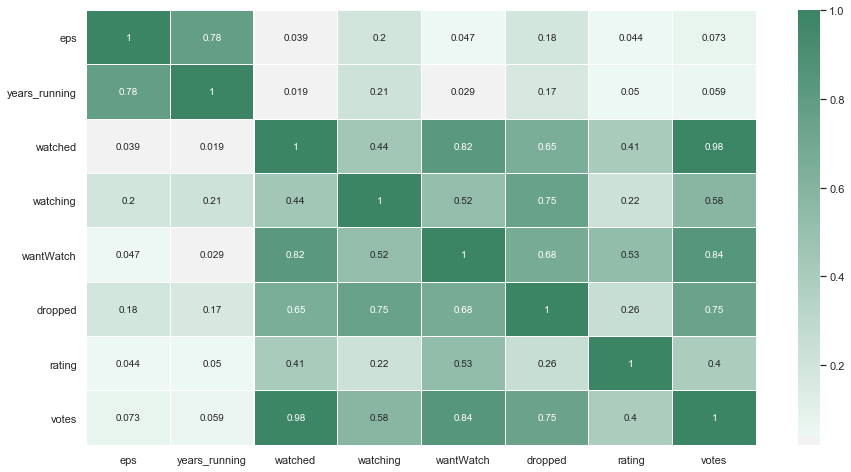

In [20]:
# creating a list of non-tag columns
corr_cols = ['eps', 'years_running', 
      'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']

plt.figure(figsize=(15,8))

cmap=sns.diverging_palette(10, 150, as_cmap=True)

ax=sns.heatmap(data[corr_cols].corr(),
            annot=True,
            linewidths=.1,
            center=0,
            cbar=True,
            cmap=cmap
            )
plt.show()

1. Episodes and years running are highly correlated (0.78)


2. Watched and want to watch are highly correlated (0.82)


3. Watched and votes are highly correlated (0.98)


4. dropped and watched are highly correlated (0.78)


5. Votes and want to watch are highly correlated (0.84)

### Distribution of Variables

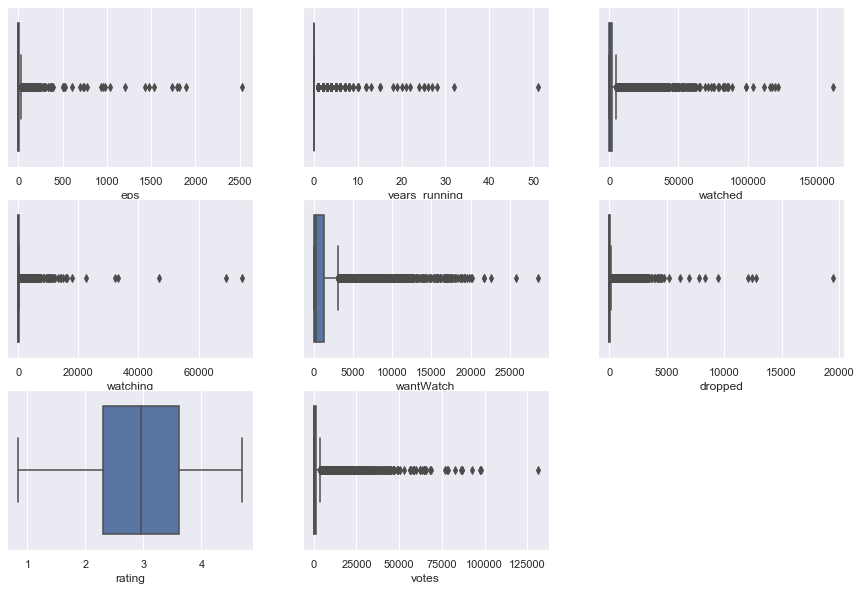

In [21]:
#--Checking Outliers

#-----------------------------Plot Outliers using Box plot------------------------------------
plt.figure(figsize=(15,10))
pos = 1
for i in corr_cols:
    plt.subplot(3, 3, pos)
    sns.boxplot(data[i])
    pos += 1 


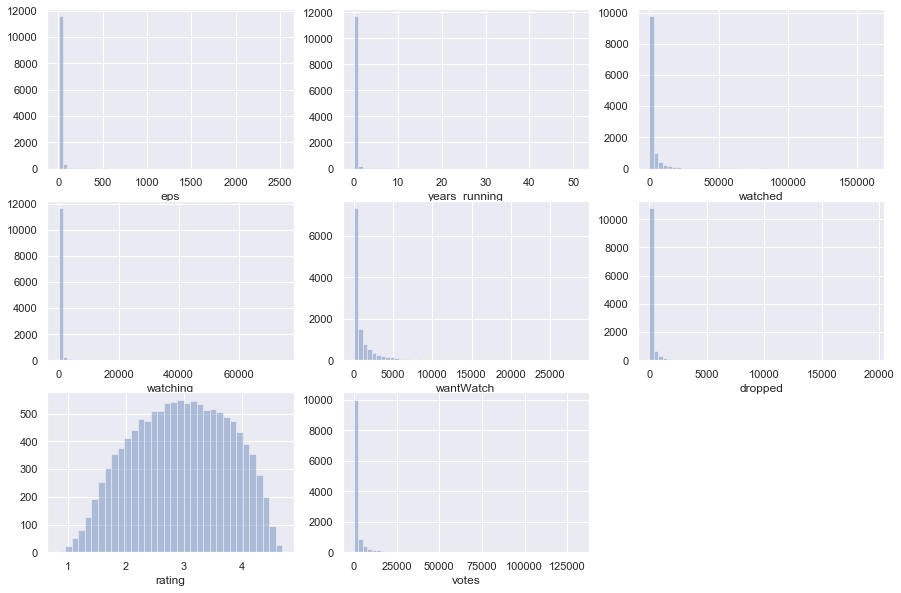

In [22]:
#-----------------------------Plot Distribution------------------------------------
plt.figure(figsize=(15,10))
pos = 1
for i in corr_cols:
    plt.subplot(3, 3, pos)
    sns.distplot(data[i],kde=False)
    pos += 1

All variables are skewed to the right except for rating where the skewness is low. It possible to have a skewed data, given the number of users, votes and other attributes vary dependening on the popularity of the movie.

### Model Development - Without any Data Treatment

### One Hot Encoding

In [23]:
data_OHE=pd.get_dummies(data, drop_first=True)

data_OHE.head()

,eps,duration,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,...,tag_Superpowers,tag_Others,tag_missing,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web
0,64,8.0,1,0,1,103707.0,14351,25810,2656,4.702,...,0,0,0,0,0,0,0,1,0,0
1,1,107.0,0,0,0,58831.0,1453,21733,124,4.663,...,0,0,0,1,0,0,0,0,0,0
2,1,130.0,0,0,1,45892.0,946,17148,132,4.661,...,0,0,0,1,0,0,0,0,0,0
3,10,8.0,0,0,0,25134.0,2183,8082,167,4.660,...,0,0,0,0,0,0,0,1,0,0
4,10,8.0,0,0,1,21308.0,3217,7864,174,4.650,...,0,0,0,0,0,0,0,1,0,0


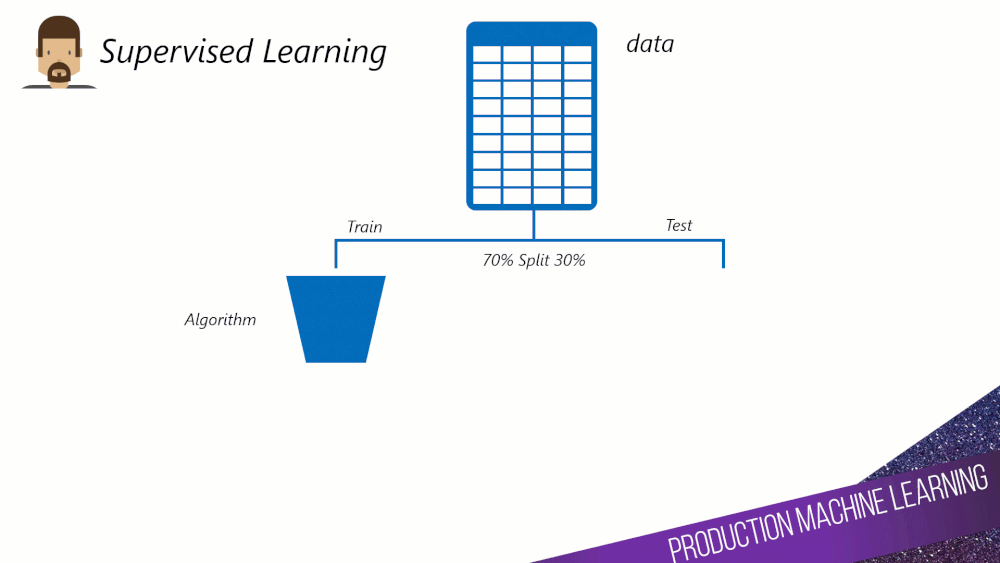

### Creating Train and Test

In [24]:
from sklearn.model_selection import train_test_split # Sklearn package for generating test and train data

#decide your regressor and predictor variables

x=data_OHE.drop(["rating"],axis=1)
y=data_OHE["rating"]

#split the data into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7) #70:30 for training and test ratio, 80:20

In [25]:
print("Training Data:", x_train.shape)
print("Test Data:", x_test.shape)

Training Data: (8470, 44)
Test Data: (3631, 44)


### Fitting Regression

In [26]:
lin_reg_model = LinearRegression() #Model Object

lin_reg_model.fit(x_train, y_train) #Model Training. Inputs are both dependent and independent variable


LinearRegression()

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Defining Error Function </span>

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Defining Error Function </span>

1. ``SSE or Sum of Squared Error``: Sum of Squared Error for each training example, also known as L2 Loss, is the square of the difference between the actual and the predicted values. Since we need to calculate the error for the dataset, we sum the error up across all training data


$\sum ^{N}_{i=1}\left( \widehat{y}_{i}-y_{i}\right) ^{2}$



2. ``Root Mean Square Error``:  The root mean square error (RMSE) is the residuals' standard deviation (prediction errors). Residuals are a measure of how far the data points are from the regression line


$\sqrt{\dfrac{\sum ^{N}_{i=1}\left( \widehat{y}_{i}-y_{i}\right) ^{2}}{N}}$


3. $R^2$: R-squared is a goodness-of-fit measure for linear regression models. This $R^2$ value indicates the percentage of the variance in the dependent variable that the independent variables explain collectively


$1-\dfrac{\sum ^{N}_{i=1}\left( \widehat{y}_{i}-y_{i}\right) ^{2}}{\sum ^{N}_{i=1}\left( y_{i}-\overline{y}\right) ^{2}}$



4. ``Mean Squared Error`` -  or MSE is the square of the difference between the actual and the predicted values divided by the total number of records from the data. In statistics, the mean squared error measures the average of the squares of the errors.

$\dfrac{\sum ^{N}_{i=1}\left( \widehat{y}_{i}-y_{i}\right) ^{2}}{N}$

In [27]:
# Adjusted R^2

def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check

def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)), #Root Mean Square Error
            "MAE": mean_absolute_error(y_act, y_pred), #Mean Absolute Error
            "R^2": r2_score(y_act, y_pred), #R2
            "Adjusted R^2": adj_r2(inp, y_act, y_pred), #Adjusted R2
        },
        index=[0],
    )

In [28]:
print("Training Performance\n")
model_perf(lin_reg_model, x_train, y_train)

Training Performance



,RMSE,MAE,R^2,Adjusted R^2
0,0.590629,0.475763,0.493645,0.491


In [29]:
# Checking model performance on test set
print("Test Performance\n")
model_perf(lin_reg_model, x_test, y_test)

Test Performance



,RMSE,MAE,R^2,Adjusted R^2
0,0.580323,0.473231,0.50032,0.494189


**Observations**

- The train and test $R^2$ are 0.487 and 0.493, indicating that the model explains 48% and 49% of the total variation in the train and test sets respectively. Also, both scores are comparable. (use the adjusted R square)


- RMSE values on the train and test sets are also comparable.


- This shows that the model is not overfitting.


- MAE indicates that our current model is able to predict anime ratings within a mean error of 0.48


- However, the overall performance is not so great.

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Data Treament - Log Transformation to get normal distribution of variables </span>

We can perform an outlier treatment. If we cap outliers, the caping is nothing but identifying outliers on either side of the whisker and replace them with these values, e.g. say we can cap them to Q3 - 1.5 IQR or Q1 + 1.5 IQR. However, even before we cap, which is bringing down the values, we can perform a data transformation. Data transformation ranges from log transformation to the square, square root of the data, etc. To keep things simple, we will try out a Log Transformation on the data, which is one of the widely used strategies. Else you can refer to Tukey's ladder as well.

In [30]:
#-----------------------------Perform Log Transformation on the Data------------------------------------

for i in corr_cols:
    
    if i!='rating':
    
        data_OHE[i]=np.log(data_OHE[i]+1) #We don't want to change rating as it follow a normal distribution

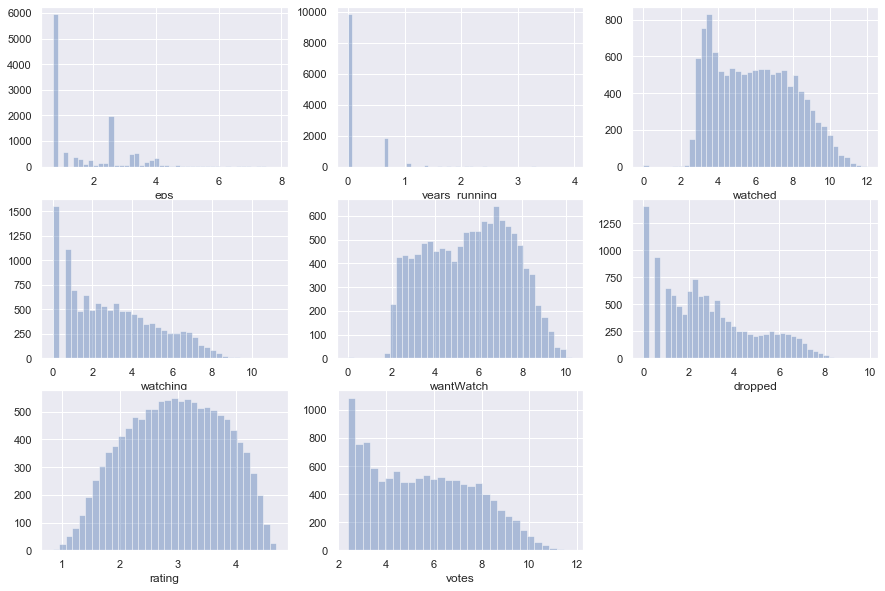

In [31]:
#-----------------------------Plot Distribution post log transformation------------------------------------
plt.figure(figsize=(15,10))
pos = 1
for i in corr_cols:
    plt.subplot(3, 3, pos)
    sns.distplot(data_OHE[i],kde=False)
    pos += 1

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Developing Model on Treated Data </span>

In [32]:
x=data_OHE.drop(["rating"],axis=1)
y=data_OHE["rating"]

#split the data into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7) #70:30 for training and test ratio, 80:20

lin_reg_model = LinearRegression() #Model Object

lin_reg_model.fit(x_train, y_train) #Model Training. Inputs are both dependent and independent variable


LinearRegression()

In [33]:
print("Training Performance\n")
model_perf(lin_reg_model, x_train, y_train)

Training Performance



,RMSE,MAE,R^2,Adjusted R^2
0,0.474769,0.371621,0.672817,0.671108


In [34]:
print("Test Performance\n")
model_perf(lin_reg_model, x_test, y_test)

Test Performance



,RMSE,MAE,R^2,Adjusted R^2
0,0.482465,0.373063,0.65463,0.650392


###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Check Distribution of Error Terms:Test Data </span>

In [35]:
y_pred = lin_reg_model.predict(x_train)

y_actual=y_train.values

data_tuples = list(zip(y_actual,y_pred))

result_tuning = pd.DataFrame(data_tuples, columns=['Actual','Predicted'])

result_tuning.head()


,Actual,Predicted
0,2.863,2.866928
1,3.147,3.308243
2,1.670,1.889962
3,2.241,2.491526
4,2.631,3.388487


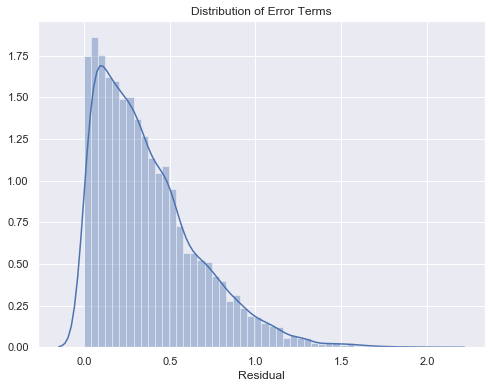

In [36]:
result_tuning['Residual']=abs(result_tuning['Actual']-result_tuning['Predicted']);

plt.figure(figsize=(8,6));

plt.title('Distribution of Error Terms')

sns.distplot(result_tuning['Residual']);

Homoskedastic (also spelled "homoscedastic") refers to a condition in which the variance of the residual, or error term, in a regression model is constant. That is, the error term does not vary much as the value of the predictor variable changes.

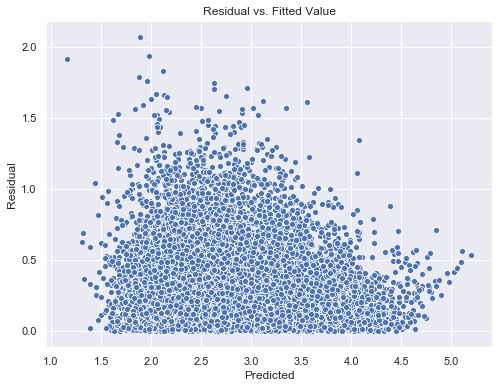

In [37]:
plt.figure(figsize=(8,6));

plt.title('Residual vs. Fitted Value')

sns.scatterplot(x=result_tuning['Predicted'],y=result_tuning['Residual'],data=result_tuning);

### Let's try and Optimize the Model before looking into the Weights

#### Sequential Forward Selection

This is called the forward elemnination method.

- Step 1: We initialize the algorithm with an empty set ∅ ("null set") so that k=0 (where k is the size of the subset). k here signifies the number of independent variable


- Step 2: Add a feature (independent variable) that maximizes the model validation criterion.


- Step 3: Repeat this procedure until the termination criterion is satisfied

http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=3,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    3.4s finished

[2021-07-29 13:50:41] Features: 1/44 -- score: 0.4971262894873251[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  43 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.0s finished

[2021-07-29 13:50:41] Features: 2/44 -- score: 0.5387008504263558[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.1s finished

[2021-07-29 13:50:41] Features: 3/44 -- score: 0.5806412673840636[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  41 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.1s

[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-07-29 13:50:50] Features: 32/44 -- score: 0.6692969095856957[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2021-07-29 13:50:50] Features: 33/44 -- score: 0.6693064566061349[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-07-29 13:50:50] Features: 34/44 -- score: 0.66932447406422[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out 

<Figure size 432x288 with 0 Axes>

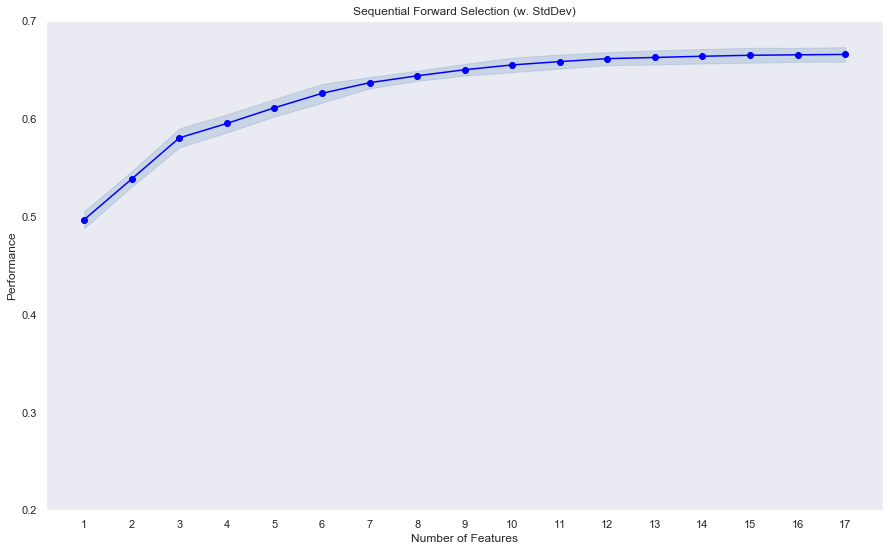

In [47]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plt.figure()

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev', figsize=(15, 9))



plt.ylim([0.20, 0.7])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [48]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=10,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=3,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    3.1s finished

[2021-07-29 14:13:08] Features: 1/10 -- score: 0.4971262894873251[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  43 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.0s finished

[2021-07-29 14:13:08] Features: 2/10 -- score: 0.5387008504263558[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  42 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.1s finished

[2021-07-29 14:13:08] Features: 3/10 -- score: 0.5806412673840636[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  41 | elapsed:    0.1s

In [49]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 6, 7, 8, 9, 10, 21, 24, 30]


In [50]:
# let us look at the names of the important features
x_train.columns[feat_cols]

Index(['eps', 'duration', 'watching', 'wantWatch', 'dropped', 'votes',
       'tag_Based_on_a_Manga', 'tag_Short_Episodes', 'tag_Shorts',
       'tag_Ecchi'],
      dtype='object')

In [51]:
x_train_final = x_train[x_train.columns[feat_cols]]

# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

LinearRegression()

In [52]:
# model performance on train set

from IPython.display import display
print("Training Performance\n")
display(model_perf(lin_reg_model2, x_train_final, y_train))

# model performance on test set
print("\n\nTest Performance\n")
display(model_perf(lin_reg_model2, x_test_final, y_test))

Training Performance



,RMSE,MAE,R^2,Adjusted R^2
0,0.486384,0.380539,0.656612,0.656206




Test Performance



,RMSE,MAE,R^2,Adjusted R^2
0,0.493903,0.384683,0.638061,0.637061


In [53]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

In [54]:
coef_df

,Coefficients
eps,0.162245
duration,0.003881
watching,0.227092
wantWatch,0.238635
dropped,-0.406749
votes,0.137448
tag_Based_on_a_Manga,0.141475
tag_Short_Episodes,-0.417058
tag_Shorts,-0.239279
tag_Ecchi,-0.324735
